## Multiple Linear Regression

Dataset link : https://www.kaggle.com/huhao05133/carseats


Description : 
          
          A simulated data set containing sales of child car seats at 400 different stores

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(r"F:\Priyanaka\Dataset\Carseats.csv",header=0)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.shape

(400, 11)

In [5]:
df.size

4400

Unique values in ShelveLoc = ['Bad' 'Good' 'Medium']
Unique values in Urban = ['Yes' 'No']
Unique values in US = ['Yes' 'No']


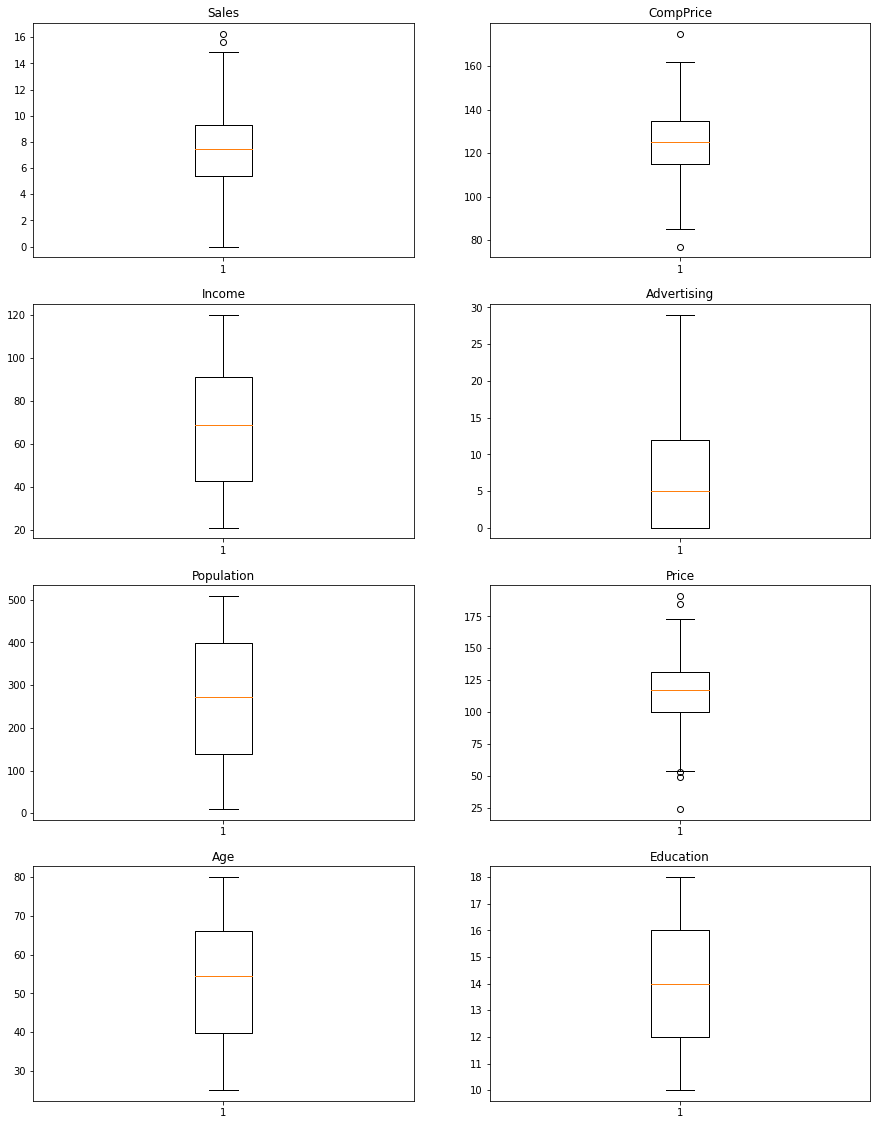

In [6]:
#cheking the unique values in each categorical columns
#also checking for outliers in non categorical columns
plt.figure(figsize = (15,25))
count = 1
for col in df:
    if(df[col].dtype == 'O'):
        print("Unique values in {} = {}".format(col,df[col].unique()))
    else:
        plt.subplot(5,2,count)
        plt.boxplot(df[col])
        plt.title(col)
        count +=1
        
plt.show()

In [7]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
##No missing value

In [9]:
df2 = df.copy()
df2['ShelveLoc'].head()

0       Bad
1      Good
2    Medium
3    Medium
4       Bad
Name: ShelveLoc, dtype: object

In [10]:
#applying label encoding on Shelveloc column
my_dict = {
    'Bad':0,
    'Medium':1,
    'Good':2
}
df2['ShelveLoc_new'] = df2['ShelveLoc'].map(my_dict)
df2['ShelveLoc_new'].head()

0    0
1    2
2    1
3    1
4    0
Name: ShelveLoc_new, dtype: int64

In [11]:
#droping old column
df2.drop('ShelveLoc',axis = 1,inplace = True)

In [12]:
#one hot encoding the other two columns and droping the first two rows
df2 = pd.get_dummies(df2,drop_first=True)

In [13]:
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_new,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,1,1
1,11.22,111,48,16,260,83,65,10,2,1,1
2,10.06,113,35,10,269,80,59,12,1,1,1
3,7.40,117,100,4,466,97,55,14,1,1,1
4,4.15,141,64,3,340,128,38,13,0,1,0


In [14]:
df2.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_new,Urban_Yes,US_Yes
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,0.554458,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,0.038549,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,-0.053465,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,0.056552,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,-0.020614,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,0.050924,0.047016,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,0.014149,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,-0.025723,-0.033094,-0.078250
ShelveLoc_new,0.554458,0.038549,-0.053465,0.056552,-0.020614,0.050924,0.014149,-0.025723,1.000000,-0.075404,0.047378
Urban_Yes,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,0.028479,-0.033094,-0.075404,1.000000,0.047085


In [15]:
#split X and y
X = df2.iloc[:,1:].values
y = df2.iloc[:,0].values

In [16]:
print("The shape of X is = {}".format(X.shape))
print("The shape of y is = {}".format(y.shape))

The shape of X is = (400, 10)
The shape of y is = (400,)


In [17]:
y = y.reshape(-1,1)

In [18]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
#fitting the training data
model.fit(X_train,y_train)

LinearRegression()

In [21]:
#Predictions
y_pred = model.predict(X_test)

In [23]:
#checking the r2score
r2_score(y_test,y_pred)

0.8001916791084243

In [24]:
mean(y_test,y_pred)

1.373587219127034

You can see that the accuracy score is greater than 0.8 it means we can use this model to solve multiple linear regression, and also mean squared error rate is also low.